In [ ]:
!wget https://www.dropbox.com/scl/fi/6n8t0fsr1uiuckiye3jbj/camote_230816.zip?rlkey=6m5dj0apzzxz0c6lf2tyzs5hx&dl=0
!unzip -q camote_230816.zip?rlkey=6m5dj0apzzxz0c6lf2tyzs5hx&dl=0
!rm -f camote_230816.zip?rlkey=6m5dj0apzzxz0c6lf2tyzs5hx&dl=0

--2023-09-01 06:02:42--  https://www.dropbox.com/scl/fi/6n8t0fsr1uiuckiye3jbj/camote_230816.zip?rlkey=6m5dj0apzzxz0c6lf2tyzs5hx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/6n8t0fsr1uiuckiye3jbj/camote_230816.zip?rlkey=6m5dj0apzzxz0c6lf2tyzs5hx [following]
--2023-09-01 06:02:43--  https://www.dropbox.com/e/scl/fi/6n8t0fsr1uiuckiye3jbj/camote_230816.zip?rlkey=6m5dj0apzzxz0c6lf2tyzs5hx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca6ee7f89acffa48c48741fd3ab.dl.dropboxusercontent.com/cd/0/inline/CC4Ddm7E3Y3tjF1KIjCU_7MG_YPR5NC64ivqAXLszNtg5Ci8EO0UNy6sh0GK14Jm4qwbtWqbES_K_5Ca2lz2JvP2saSgOI6Ea4GxAfj7REFHK6B67HT2624m2zgIVmuc8g4/file# [following]
--2023-09-01 06:02:43--  https://uca6ee7f89acffa48c48741fd3a

In [ ]:
!git clone https://github.com/trucomanx/DataGeneratorTool.git
import sys
sys.path.append('DataGeneratorTool/src')



Cloning into 'DataGeneratorTool'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 52 (delta 15), reused 44 (delta 10), pack-reused 0
Receiving objects: 100% (52/52), 490.24 KiB | 7.43 MiB/s, done.
Resolving deltas: 100% (15/15), done.


#  Variables

In [ ]:
root_dir='./';
csv_filepath='out_dataframe.csv';
col_id_x=0;
col_id_y=2;
col_id_check=3;

dataset_test_percent=0.3;
dataset_val_percent=0.25; #relative at (1-dataset_test_percent)

seed_number=42;

EPOCHS=40;
BATCH_SIZE=16;


checkpoint_filepath = 'model.h5'

# Seeds

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(seed_number);
np.random.seed(seed_number)


# Load dataframe

In [ ]:
import pandas as pd

# Loading the full dataset in the dataframe df
df=pd.read_csv(csv_filepath);


# Drop mode errors
print('Drop')
print('BEFORE df.shape:',df.shape)
check=df.iloc[:,col_id_check].to_numpy();
IDS=(check==1).nonzero()[0].tolist();
print('IDs:',IDS)
df=df.drop(df.index[IDS]);
print('AFTER df.shape:',df.shape)
print(' ')

# Drop label
Label_drop=2;
print('Drop label')
print('BEFORE df.shape:',df.shape)
check=df.iloc[:,col_id_y].to_numpy();
IDS=(check==Label_drop).nonzero()[0].tolist();
print('IDs:',IDS)
print('len(IDs):',len(IDS))
df=df.drop(df.index[IDS]);
print('AFTER df.shape:',df.shape)
print(' ')

# Repeat
'''
import DataGeneratorTool.ToolDataframe as DGTDF
print('Repeat')
print('BEFORE df.shape:',df.shape)
df_new=DGTDF.repeat_and_balance_data_in_dataframe(df,col_id_y,[2,3]);
df=pd.concat([df, df_new]);
print('AFTER df.shape:',df.shape)
print(' ')
'''

# Loading the full dataset in X_full and y_full
import DataGeneratorTool.LoadDataframe as DGLDF
X_full ,y_full  = DGLDF.load_numpy_batch_from_dataframe(df,
                                                        col_id_x=col_id_x,
                                                        col_id_y=col_id_y);
print(' ')
print('X_full.shape:',X_full.shape)
print('y_full.shape:',y_full.shape)

Drop
BEFORE df.shape: (747, 4)
IDs: [31, 93, 107, 123, 162, 225, 254, 266, 267, 277, 282, 362, 385, 427, 442, 474, 512, 513, 534, 538, 551, 575, 614, 618, 676, 688, 723, 724, 728]
AFTER df.shape: (718, 4)
 
Drop label
BEFORE df.shape: (718, 4)
IDs: [2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 80, 81, 82, 85, 86, 87, 89, 91, 92, 93, 94, 95, 97, 98, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 113, 114, 116, 118, 119, 122, 123, 125, 126, 127, 128, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 143, 144, 145, 146, 147, 148, 149, 150, 152, 154, 156, 158, 160, 161, 164, 165, 166, 167, 169, 170, 171, 172, 173, 175, 176, 179, 180, 181, 182, 184, 185, 187, 188, 189, 191, 193, 195, 196, 197, 198, 199, 202, 203, 204, 205, 208, 213, 217, 218, 219, 220, 221, 222, 224, 225, 22

## X_full analysis

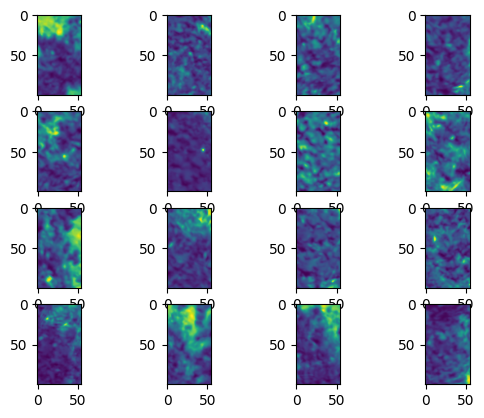

In [ ]:
import matplotlib.pyplot as plt
Nlin=4;
Ncol=4;
fig, axs = plt.subplots(Nlin,Ncol);
n=0;
for l in range(Nlin):
    for c in range(Ncol):
      axs[l,c].imshow(X_full[n][:,:,0]);
      n=n+1;
plt.show();


## y_full analysis

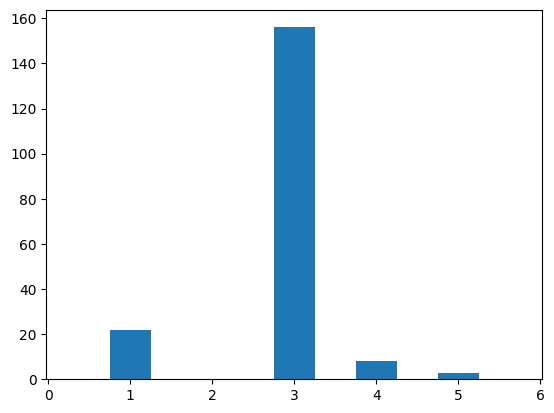

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_full,bins=[n*0.5+0.25 for n in range(12)])
plt.show()

# Test dataset: X_test, y_test

In [ ]:
from sklearn.model_selection import train_test_split


train_full_df, test_df = train_test_split(  df,
                                            test_size=dataset_test_percent,
                                            random_state=seed_number,
                                            shuffle=True,
                                            stratify=np.round(df.iloc[:,col_id_y].to_numpy()));

X_test ,y_test  = DGLDF.load_numpy_batch_from_dataframe(test_df,
                                                        col_id_x=col_id_x,
                                                        col_id_y=col_id_y);

#Train dataset: train_dg, val_dg

In [ ]:
from DataGeneratorTool.MultiSpectralFromDataframe import DataGeneratorFromDataframe

train_df, val_df = train_test_split(  train_full_df,
                                      test_size=dataset_val_percent,
                                      random_state=seed_number,
                                      shuffle=True,
                                      stratify=np.round(train_full_df.iloc[:,col_id_y].to_numpy()));

train_dg = DataGeneratorFromDataframe(train_df,col_id_x,col_id_y,root_dir,
                                      rotation_range=15,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      zoom_range=[0.8,1.2],
                                      batch_size=BATCH_SIZE,
                                      shuffle=True);

val_dg   = DataGeneratorFromDataframe(val_df,col_id_x,col_id_y,root_dir,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True);


# Creating the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


lrelu=tf.keras.layers.LeakyReLU(alpha=0.02)
input_shape=X_test[0].shape;
print('input_shape:',input_shape)

model = Sequential()
model.add(Conv2D(32, (5, 5), activation=lrelu, padding='same', input_shape=input_shape))
model.add(Conv2D(32, (5, 5), activation=lrelu, padding='same'))
model.add(Conv2D(32, (5, 5), activation=lrelu, padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation=lrelu, padding='same'))
model.add(Conv2D(32, (5, 5), activation=lrelu, padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation=lrelu, padding='same'))
model.add(Conv2D(32, (3, 3), activation=lrelu, padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation=lrelu, padding='same'))
model.add(Conv2D(32, (3, 3), activation=lrelu, padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(96, activation=lrelu))
model.add(Dense(32, activation=lrelu))
model.add(Dense(1, activation=lrelu))

model.summary()

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])



input_shape: (100, 55, 6)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 55, 32)       4832      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 55, 32)       25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 55, 32)       25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 27, 32)        25632     
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 27, 32)        25632     
                              

# Training the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            save_weights_only=True,
                                            monitor='val_mae',
                                            save_best_only=True,
                                            verbose=1)


history = model.fit(train_dg,
                    epochs=EPOCHS,
                    validation_data = val_dg,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])


Epoch 1/40
7/7 [==============================] - ETA: 0s - loss: 17.9755 - mae: 3.1795 - mse: 17.9755
Epoch 1: val_mae improved from inf to 1.64206, saving model to model.h5
7/7 [==============================] - 18s 2s/step - loss: 17.9755 - mae: 3.1795 - mse: 17.9755 - val_loss: 3.0910 - val_mae: 1.6421 - val_mse: 3.0910
Epoch 2/40
7/7 [==============================] - ETA: 0s - loss: 1.6165 - mae: 1.0789 - mse: 1.6165
Epoch 2: val_mae improved from 1.64206 to 1.26249, saving model to model.h5
7/7 [==============================] - 16s 2s/step - loss: 1.6165 - mae: 1.0789 - mse: 1.6165 - val_loss: 2.0998 - val_mae: 1.2625 - val_mse: 2.0998
Epoch 3/40
7/7 [==============================] - ETA: 0s - loss: 1.0787 - mae: 0.8664 - mse: 1.0787
Epoch 3: val_mae improved from 1.26249 to 0.53130, saving model to model.h5
7/7 [==============================] - 15s 2s/step - loss: 1.0787 - mae: 0.8664 - mse: 1.0787 - val_loss: 0.6127 - val_mae: 0.5313 - val_mse: 0.6127
Epoch 4/40
7/7 [======

# Training history plot: mae, mse

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


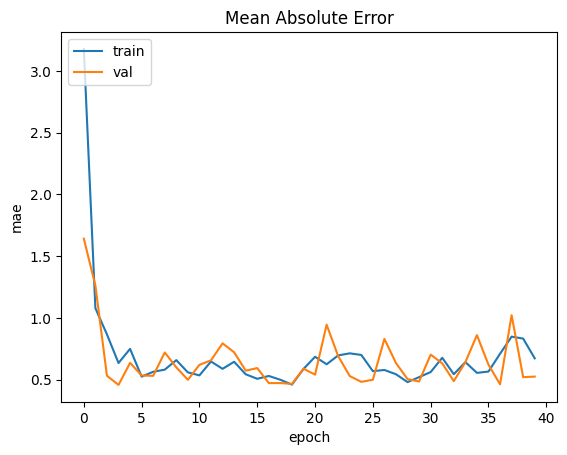

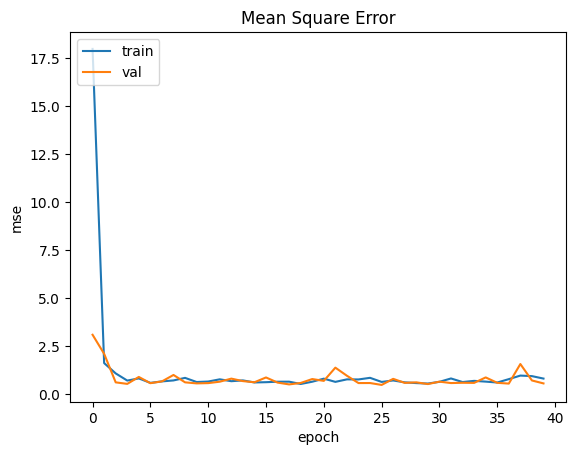

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Mean Square Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loading best model

In [ ]:
# Loads the weights
model.load_weights(checkpoint_filepath)


# Testing metrics

2/2 [==============================] - 1s 510ms/step - loss: 0.5502 - mae: 0.4691 - mse: 0.5502
 
loss: 0.55019611120224 mae: 0.46914130449295044 mse: 0.55019611120224
 
2/2 [==============================] - 1s 491ms/step


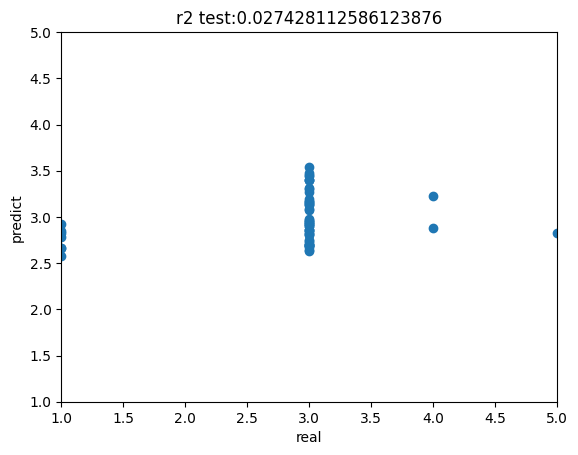

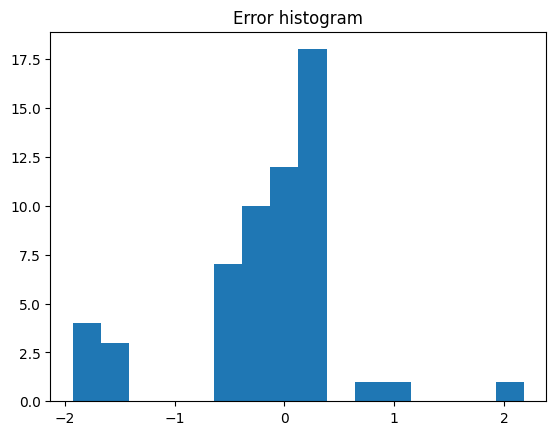

In [ ]:
from sklearn.metrics import r2_score

# Re-evaluate the model
loss,mae,mse = model.evaluate(X_test, y_test, verbose=1)
print(' ')
print('loss:',loss,'mae:',mae,'mse:',mse)
print(' ')

y_pred=model.predict(X_test)
y_pred=y_pred.reshape(-1,)

r2=r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred)
plt.title('r2 test:'+str(r2))
plt.ylabel('predict')
plt.xlabel('real')
MIN=np.min([np.min(y_test),np.min(y_pred)]);
MAX=np.max([np.max(y_test),np.max(y_pred)]);
plt.xlim(np.floor(MIN),np.ceil(MAX))
plt.ylim(np.floor(MIN),np.ceil(MAX))
plt.show()

plt.hist(y_test-y_pred,bins=16)
plt.title('Error histogram')
plt.show()